<a href="https://colab.research.google.com/github/yuvalgrossman/EquSolve/blob/master/EquSolverIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EquSolver
Hand written equation solver

# Intro
This project is tend to scan hand written equations from a hardcopy paper. 
There are 2 main steps: 
1. Recognize the equation
2. Solve it using symbolic solver

The first mission consists of symbols and numbers detection and combining them in the right way. 

The detection could be addressed by using relatively simple computer vision techniques to seperate the symbols and then use a simple machine learning model to recognize which symbol are there. 
Another approche would be to directly train convolutional neural network of a suitable architecture for object detection (we can use detectron or YOLO for that). 

# Benchmarks
There are 3 levels we hope to get to:
### Basic operations:
1. recognizing digits
2. combining digits to numbers
3. recognizing basic operations signs (-+/x*^ sqrt)
4. computing basic operations consisting of numbers and basic operations 

### Algebraic equations:
5. recognizing letters as variables
6. solving single variable equation
7. solving multiple variables equations
8. recognizing basic functions (trigo, log) and solving such equations

### Differential equations:
9. recognizing differential operators (integrals, differentials)
10. compute differential operations
11. solving differential equations! 


# Data

In [2]:
!git clone https://github.com/ThomasLech/CROHME_extractor
# check the kaggle dataset and the owner blog:
# https://www.kaggle.com/xainano/handwrittenmathsymbols?select=data.rar
# https://blog.mathocr.com/2017/06/09/handwritten-character-segmentation.html

Cloning into 'CROHME_extractor'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 59.17 MiB | 37.28 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [3]:
!unzip CROHME_extractor/data/CROHME_full_v2.zip

Streaming output truncated to the last 5000 lines.
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_1.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_11.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_13.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_15.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_17.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_20.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_29.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_33.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_39.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainINKML/KAIST/TrainData2_26_sub_41.inkml  
  inflating: CROHME_full_v2/CROHME2013_data/TrainI

NameError: ignored

In [ ]:
!pip install kaggle
api_token = {"username":"USERNAME","key":"API_KEY"}
import json
import zipfile
import os
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge
os.chdir('/content/competitions/jigsaw-toxic-comment-classification-challenge')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [15]:
!wget 'https://zenodo.org/record/259444/files/HASYv2.tar.bz2?download=1'
import tarfile
my_tar = tarfile.open('HASYv2.tar.bz2?download=1')
my_tar.extractall() # specify which folder to extract to
my_tar.close()

In [29]:
!ls

 classification-task    hasy_tools.py		     symbols.csv
 hasy-data	       'HASYv2.tar.bz2?download=1'   verification-task
 hasy-data-labels.csv   README.txt


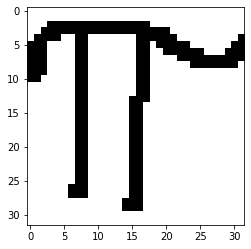

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
meta_data = pd.read_csv('hasy-data-labels.csv')
img = plt.imread(meta_data['path'][603])
plt.imshow(img)